# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.formula.api as smf
import scipy.stats as stats
import pandas_profiling


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [2]:
emp=pd.read_csv("HR_comma_sep.csv")

In [3]:
emp.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# profile_report=pandas_profiling.ProfileReport(emp)

In [5]:
# profile_report

In [6]:
# profile_report.to_file('Profile Report.html')

### Checking for duplicate records

In [7]:
emp[emp.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [8]:
emp.drop_duplicates(keep='first',inplace=True)

In [9]:
emp.shape

(11991, 10)

In [10]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


### Missing Value Treatment

In [11]:
emp.isna().sum() #checking for null values

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Encoding

In [12]:
emp['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

In [13]:
emp['salary'].value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

In [14]:
department_dummies=pd.get_dummies(emp.department,prefix='Department')

In [15]:
emp['salary_encoded']=np.where(emp['salary']=='low',1,(np.where(emp['salary']=='medium',2,(np.where(emp['salary']=='high',3,np.nan)))))

In [16]:
emp['salary'].value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

In [17]:
emp['salary_encoded'].value_counts()

1.0    5740
2.0    5261
3.0     990
Name: salary_encoded, dtype: int64

In [18]:
emp=pd.concat([emp,department_dummies],axis=1)

In [19]:
emp.drop(columns=['department','salary'],inplace=True)

In [20]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11991 non-null  float64
 1   last_evaluation         11991 non-null  float64
 2   number_project          11991 non-null  int64  
 3   average_montly_hours    11991 non-null  int64  
 4   time_spend_company      11991 non-null  int64  
 5   Work_accident           11991 non-null  int64  
 6   left                    11991 non-null  int64  
 7   promotion_last_5years   11991 non-null  int64  
 8   salary_encoded          11991 non-null  float64
 9   Department_IT           11991 non-null  uint8  
 10  Department_RandD        11991 non-null  uint8  
 11  Department_accounting   11991 non-null  uint8  
 12  Department_hr           11991 non-null  uint8  
 13  Department_management   11991 non-null  uint8  
 14  Department_marketing    11991 non-null

In [21]:
emp=emp[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary_encoded',
       'Department_IT', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical','left']]

In [22]:
emp

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_encoded,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,left
0,0.38,0.53,2,157,3,0,0,1.0,0,0,0,0,0,0,0,1,0,0,1
1,0.80,0.86,5,262,6,0,0,2.0,0,0,0,0,0,0,0,1,0,0,1
2,0.11,0.88,7,272,4,0,0,2.0,0,0,0,0,0,0,0,1,0,0,1
3,0.72,0.87,5,223,5,0,0,1.0,0,0,0,0,0,0,0,1,0,0,1
4,0.37,0.52,2,159,3,0,0,1.0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,1,3.0,0,0,0,0,1,0,0,0,0,0,0
11996,0.74,0.95,5,266,10,0,1,3.0,0,0,0,0,1,0,0,0,0,0,0
11997,0.85,0.54,3,185,10,0,1,3.0,0,0,0,0,1,0,0,0,0,0,0
11998,0.33,0.65,3,172,10,0,1,3.0,0,0,0,0,0,1,0,0,0,0,0


## Feature Engineering

<AxesSubplot:>

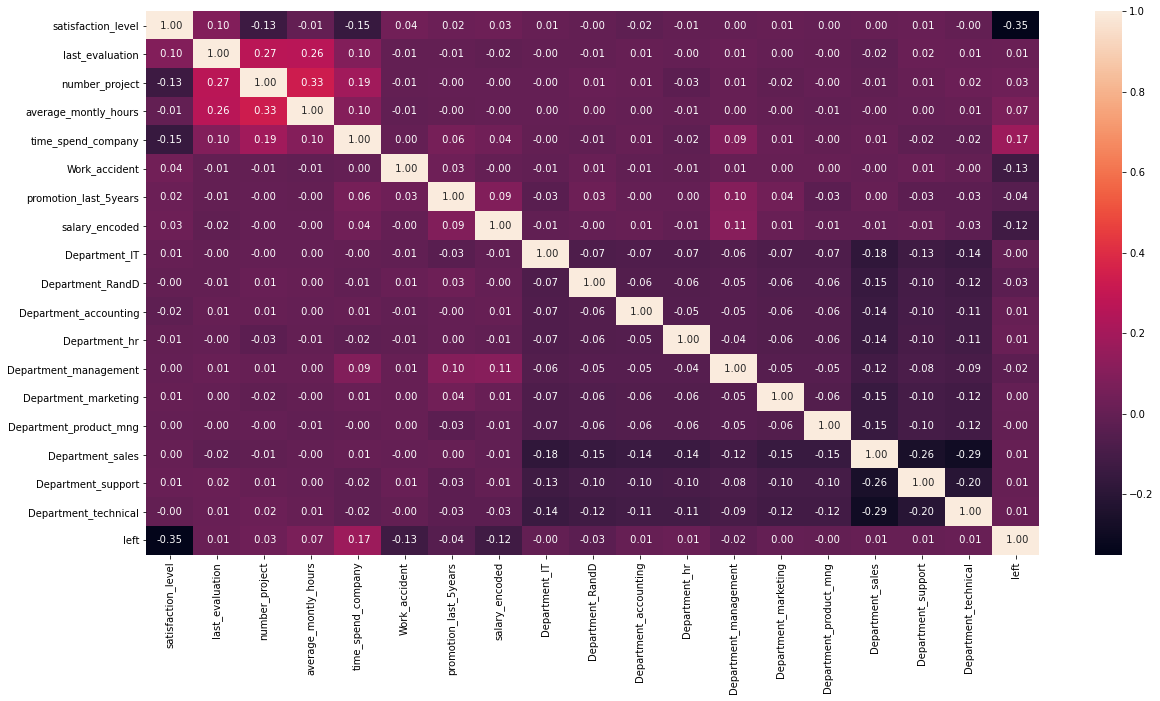

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(emp.corr(),cbar=True,fmt =' .2f', annot=True)

In [24]:
gini_df = pd.DataFrame()
for col in emp.columns.difference(['left']):
    model = smf.logit('left~'+str(col), data=emp).fit()
    gini = 2*roc_auc_score(emp.left, model.predict(emp))-1
    temp = pd.DataFrame([col, gini]).T
    gini_df = pd.concat([gini_df, temp], axis=0)

Optimization terminated successfully.
         Current function value: 0.449548
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.449100
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.449536
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.449464
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.449230
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.449553
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.449546
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.449534
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.449535
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.449504
  

In [25]:
gini_df.columns = ['feature', 'gini']

In [26]:
gini_df.sort_values(by='gini', ascending=False)

,feature,gini
0,satisfaction_level,0.494017
0,time_spend_company,0.381564
0,salary_encoded,0.158608
0,Work_accident,0.121763
0,average_montly_hours,0.0739
0,Department_RandD,0.018208
0,promotion_last_5years,0.015482
0,Department_management,0.012282
0,Department_technical,0.010481
0,last_evaluation,0.008944


### RFE

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
X = emp[emp.columns.difference(['left'])]
y = emp[['left']]

rfe = RFE(RandomForestClassifier(), 5)
rfe = rfe.fit(X, y)

In [28]:
X.columns[rfe.support_]

Index(['average_montly_hours', 'last_evaluation', 'number_project',
       'satisfaction_level', 'time_spend_company'],
      dtype='object')

### Select K Best

In [29]:
SKB = SelectKBest(f_classif, k=5).fit(X, y )

X.columns[SKB.get_support()]

Index(['Work_accident', 'average_montly_hours', 'salary_encoded',
       'satisfaction_level', 'time_spend_company'],
      dtype='object')

### VIF for Multicollinierity

In [30]:
final_list=X[[
            'Work_accident',
#              'average_montly_hours',
              'salary_encoded',
           'satisfaction_level',
#             'last_evaluation',
#         'number_project',
              'time_spend_company'
             ]]

In [31]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(final_list.values, i) for i in range(final_list.shape[1])]
vif["features"] = final_list.columns

In [32]:
vif.sort_values(by='VIF_Factor',ascending=False)

,VIF_Factor,features
1,5.580846,salary_encoded
2,4.900055,satisfaction_level
3,4.781971,time_spend_company
0,1.179273,Work_accident


In [33]:
data_final = pd.concat([final_list, y], axis=1)

In [34]:
data_final.head()

,Work_accident,salary_encoded,satisfaction_level,time_spend_company,left
0,0,1.0,0.38,3,1
1,0,2.0,0.80,6,1
2,0,2.0,0.11,4,1
3,0,1.0,0.72,5,1
4,0,1.0,0.37,3,1


# Modelling

## Logistic Regression

In [35]:
train, test = train_test_split(data_final, test_size=0.3, random_state=123)

In [36]:
formula='left~'+'+'.join(final_list.columns,)

In [37]:
formula

'left~Work_accident+salary_encoded+satisfaction_level+time_spend_company'

In [38]:
model = smf.logit(formula=formula, data=train).fit()

Optimization terminated successfully.
         Current function value: 0.368907
         Iterations 7


In [39]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                 8393
Model:                          Logit   Df Residuals:                     8388
Method:                           MLE   Df Model:                            4
Date:                Sun, 27 Jun 2021   Pseudo R-squ.:                  0.1820
Time:                        20:41:14   Log-Likelihood:                -3096.2
converged:                       True   LL-Null:                       -3785.0
Covariance Type:            nonrobust   LLR p-value:                4.933e-297
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.5614      0.139      4.033      0.000       0.289       0.834
Work_accident         -1.3614      0.129    -10.572      0.000      -1.614      -1.109
salary_encoded      

In [40]:
#Train Data
#somerceD = 2*AUC-1
2*roc_auc_score(train.left, model.predict())-1

0.6145179481148642

In [41]:
roc_auc_score(train.left, model.predict())

0.8072589740574321

In [42]:
# Test Data
print('Test_Gini : ', 2*roc_auc_score(test.left, model.predict(test))-1)

Test_Gini :  0.6247053056256762


In [43]:
print('Test_Auc : ',roc_auc_score(test.left, model.predict(test)))

Test_Auc :  0.8123526528128381


In [44]:
emp.shape

(11991, 19)

In [45]:
emp.left.value_counts()/emp.shape[0]

0    0.833959
1    0.166041
Name: left, dtype: float64

In [46]:
train.shape

(8393, 5)

In [47]:
test.shape

(3598, 5)

In [48]:
train['prob']=model.predict(train)
test['prob']=model.predict(test)

In [49]:
train['pred']=np.where(train['prob']> 0.2,1,0)

In [50]:
confusion_matrix(train.left, train.pred)

array([[5542, 1450],
       [ 501,  900]], dtype=int64)

In [51]:
print(classification_report(train.left,train.pred))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      6992
           1       0.38      0.64      0.48      1401

    accuracy                           0.77      8393
   macro avg       0.65      0.72      0.67      8393
weighted avg       0.83      0.77      0.79      8393



In [52]:
test['pred']=np.where(test['prob']> 0.2,1,0)

In [53]:
confusion_matrix(test.left, test.pred)

array([[2436,  572],
       [ 217,  373]], dtype=int64)

In [54]:
print(classification_report(test.left,test.pred))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      3008
           1       0.39      0.63      0.49       590

    accuracy                           0.78      3598
   macro avg       0.66      0.72      0.67      3598
weighted avg       0.83      0.78      0.80      3598



## KNN Classifier

In [55]:
emp.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_encoded,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,left
0,0.38,0.53,2,157,3,0,0,1.0,0,0,0,0,0,0,0,1,0,0,1
1,0.80,0.86,5,262,6,0,0,2.0,0,0,0,0,0,0,0,1,0,0,1
2,0.11,0.88,7,272,4,0,0,2.0,0,0,0,0,0,0,0,1,0,0,1
3,0.72,0.87,5,223,5,0,0,1.0,0,0,0,0,0,0,0,1,0,0,1
4,0.37,0.52,2,159,3,0,0,1.0,0,0,0,0,0,0,0,1,0,0,1


In [56]:
emp.left.value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [57]:
emp_scaled=MinMaxScaler()

In [58]:
emp_scaled=emp_scaled.fit_transform(emp)

In [59]:
emp_scaled=pd.DataFrame(emp_scaled)

In [60]:
emp_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11986,0.890110,0.296875,0.2,0.761682,1.000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11987,0.714286,0.921875,0.6,0.794393,1.000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11988,0.835165,0.281250,0.2,0.415888,1.000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11989,0.263736,0.453125,0.2,0.355140,1.000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [61]:
emp_scaled[18].value_counts()

0.0    10000
1.0     1991
Name: 18, dtype: int64

In [62]:
X_scaled=emp_scaled.drop(columns=18)

In [63]:
Y_scaled=emp_scaled[18]

In [64]:
Y_scaled

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
11986    0.0
11987    0.0
11988    0.0
11989    0.0
11990    0.0
Name: 18, Length: 11991, dtype: float64

In [65]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, Y_scaled, test_size=0.30, random_state=101)

In [66]:
params={'n_neighbors':[2,3,4,5,6,7,8,9],'weights':['uniform','distance']}

In [67]:
knn=GridSearchCV(KNeighborsClassifier(),param_grid=params,cv=5,scoring='roc_auc')

In [68]:
knn=knn.fit(X_train_scaled,y_train_scaled)

In [69]:
knn.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

In [70]:
knn.best_score_

0.9442779300875662

In [71]:
knn=KNeighborsClassifier(n_neighbors=9,weights='distance')

In [72]:
knn=knn.fit(X_train_scaled,y_train_scaled)

In [73]:
knn_train_pred=knn.predict(X_train_scaled)

In [74]:
knn_test_pred=knn.predict(X_test_scaled)

In [75]:
print('KNN Classifier Train Confusion Matix : \n',confusion_matrix(y_train_scaled, knn_train_pred))
print('\n')
print('KNN Classifier Train Classification Report :\n ',classification_report(y_train_scaled, knn_train_pred))

KNN Classifier Train Confusion Matix : 
 [[7029    0]
 [   0 1364]]


KNN Classifier Train Classification Report :
                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7029
         1.0       1.00      1.00      1.00      1364

    accuracy                           1.00      8393
   macro avg       1.00      1.00      1.00      8393
weighted avg       1.00      1.00      1.00      8393



In [76]:
print('KNN Classifier Test Confusion Matix : \n',confusion_matrix(y_test_scaled, knn_test_pred))
print('\n')
print('KNN Classifier Test Classification Report :\n ',classification_report(y_test_scaled, knn_test_pred))

KNN Classifier Test Confusion Matix : 
 [[2858  113]
 [  73  554]]


KNN Classifier Test Classification Report :
                precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      2971
         1.0       0.83      0.88      0.86       627

    accuracy                           0.95      3598
   macro avg       0.90      0.92      0.91      3598
weighted avg       0.95      0.95      0.95      3598



## Decision Tree Classifier

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
y=y.left

In [79]:
DT_params={'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6],'max_leaf_nodes':[3,4,5,6,7],}

In [80]:
DT_grid=GridSearchCV(DecisionTreeClassifier(),param_grid=DT_params,cv=5,n_jobs=-1)

In [81]:
DT_grid=DT_grid.fit(X,y)

In [82]:
DT_grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 7}

In [83]:
DT_grid.best_score_

0.9596353915883078

In [84]:
DT=DecisionTreeClassifier(criterion='gini',max_depth=3,max_leaf_nodes=7)

In [85]:
DT=DT.fit(X,y)

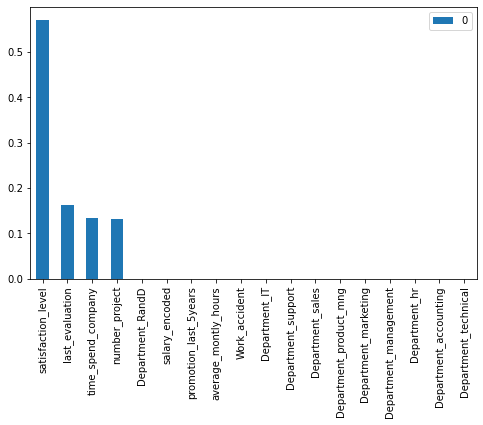

In [86]:
pd.DataFrame(DT.feature_importances_,index=X.columns).sort_values(by=0,ascending=False).plot(kind='bar',figsize=(8,5))
plt.show()

In [87]:
print('Decision Tree Confusion Matrix :\n',metrics.confusion_matrix(y,DT.predict(X)))

Decision Tree Confusion Matrix :
 [[9678  322]
 [ 159 1832]]


In [88]:
print('Decision Tree Classification Report :\n',metrics.classification_report(y,DT.predict(X)))

Decision Tree Classification Report :
               precision    recall  f1-score   support

           0       0.98      0.97      0.98     10000
           1       0.85      0.92      0.88      1991

    accuracy                           0.96     11991
   macro avg       0.92      0.94      0.93     11991
weighted avg       0.96      0.96      0.96     11991



## RANDOM FOREST CLASSIFIER

In [89]:
X_train, X_test, y_train, y_test = train_test_split(final_list, y, test_size=0.30, random_state=101)

In [90]:
rf = RandomForestClassifier()

In [91]:
rf=rf.fit(X_train,y_train)

In [92]:
pred_train_rf=rf.predict(X_train)
pred_test_rf=rf.predict(X_test)

In [93]:
print('Random Forest Train Confusion Matix : \n',confusion_matrix(y_train, pred_train_rf))
print('\n')
print('Random Forest Train Classification Report :\n ',classification_report(y_train, pred_train_rf))

Random Forest Train Confusion Matix : 
 [[6888  141]
 [ 127 1237]]


Random Forest Train Classification Report :
                precision    recall  f1-score   support

           0       0.98      0.98      0.98      7029
           1       0.90      0.91      0.90      1364

    accuracy                           0.97      8393
   macro avg       0.94      0.94      0.94      8393
weighted avg       0.97      0.97      0.97      8393



In [94]:
print('Random Forest Test Confusion Matix : \n',confusion_matrix(y_test, pred_test_rf))
print('\n')
print('Random Forest Test Classification Report :\n ',classification_report(y_test, pred_test_rf))

Random Forest Test Confusion Matix : 
 [[2885   86]
 [  72  555]]


Random Forest Test Classification Report :
                precision    recall  f1-score   support

           0       0.98      0.97      0.97      2971
           1       0.87      0.89      0.88       627

    accuracy                           0.96      3598
   macro avg       0.92      0.93      0.92      3598
weighted avg       0.96      0.96      0.96      3598



## ==============HAPPY LEARNING===============